In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))


<b><font size = "6" color = "red">ch12. 데이터시각화 </font></b>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도 시각화)
- matplotlib: 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 차트기능. groupby기능을 추가한 라이브러리
# 1절 matplotlib
- https://matplotlib.org/
- https://matplotlib.org/stable/api/pyplot_summary.html
## 1.1패키지 import 및 기본 설정

In [84]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
# 한글 설정 (windows mac)
plt.rc('font', family='Malgun Gothic') # 윈도우OS
# plt.rc('font', family='Apple Gothic') # 맥OS
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
""
# warning 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안보이게

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장<br>

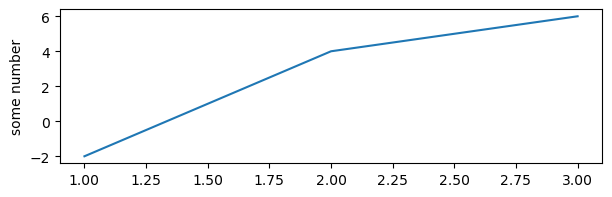

AttributeError: 'str' object has no attribute 'size'

<Figure size 640x480 with 0 Axes>

In [7]:
x = [1,2,3] #1) 그래프에 데이터 기입
y = [-2,4,6] 
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성 사이즈는 인치
plt.plot(x,y) #3) 그래프를 그린다
plt.ylabel('some number') # 4) 커스텀마이징
plt.show() #5) 출력
plt.savefig('data/ch12.png',bbox_inches='tigth') #파일출력

## 1.3 그래프 영역 나누기
### 1) subplot() 함수로 서브 플롯 추가

In [4]:
import numpy as np
x = np.arange(0,10,0.1) #np.linspace(0,9.9,100)

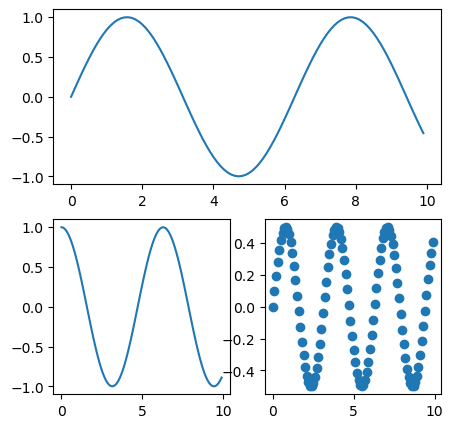

In [12]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1) #2행1열로 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x))
plt.subplot(2,2,3) # 2행2열 subplot증 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(224) #2행2열 subplot중 4번째 subplot
plt.scatter(x,np.sin(x)*np.cos(x))

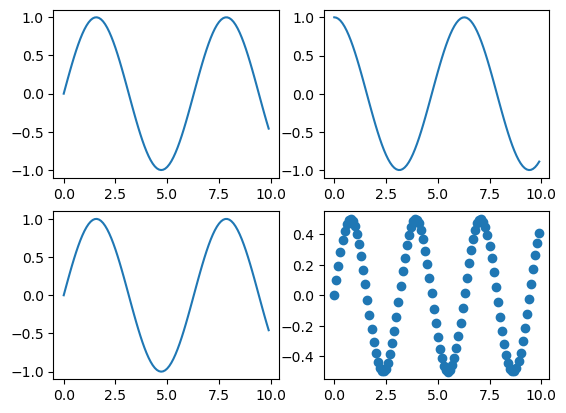

In [15]:
plt.subplot(2,2,3)
plt.plot(x, np.sin(x))
plt.subplot(2,2,1)
plt.plot(x, np.sin(x))
plt.subplot(2,2,2)
plt.plot(x, np.cos(x))
plt.subplot(224)
plt.scatter(x,np.sin(x)*np.cos(x))
plt.show()

### 2) subplots()함수로 서브 플롯 추가
- plot함수에 색상이나 스타일 조정(교안 14page)

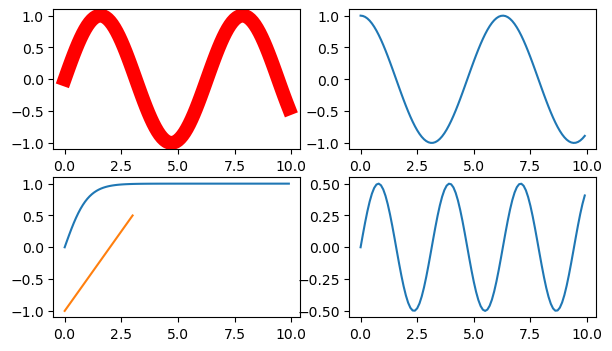

In [22]:
# 2행2열 서브 플롯
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x,np.sin(x),c='r',linewidth=10)
axes[0,1].plot(x,np.cos(x), 'c--') # c='c', linestyle='--'
axes[1,0].plot(x,np.tanh(x), '#00AA00')
axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5],'ko:') # k: black, marker='0', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x))
plt.show()

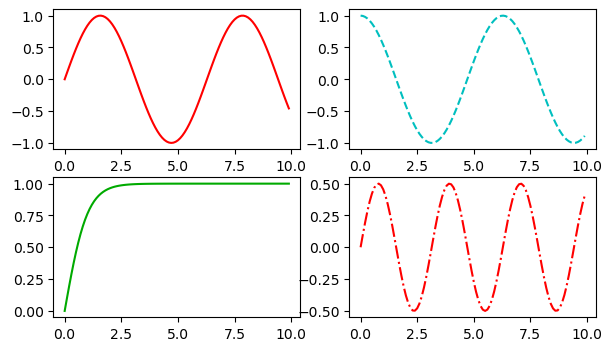

In [24]:
# 2행2열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x: np.sin(x)*np.cos(x)]
fmt = ['r', 'c--', '#00AA00','r-.']
fig, axes= plt.subplots(2,2,figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x),fmt[i])

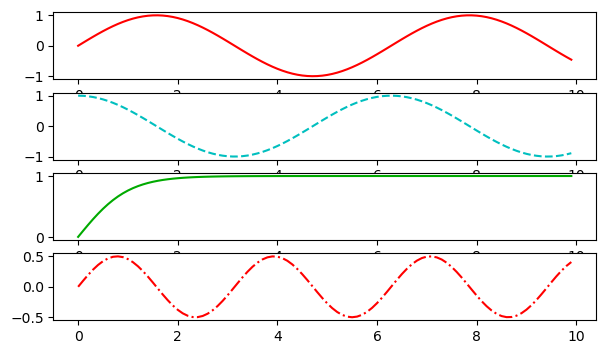

In [25]:
# 4행1열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x: np.sin(x)*np.cos(x)]
fmt = ['r', 'c--', '#00AA00','r-.']
fig, axes= plt.subplots(4,1,figsize=(7,4))

for i, ax in enumerate(axes):
    ax.plot(x, func[i](x),fmt[i])

## 1.4 다양한 그래프 그리기
### 1) pyplot 함수들 (교안 16page)

### 2) matplotlib.pyplot.plot(): 선그래프

### 3) pandas.DataFrame.plot():
- plt.____(x,y,fmt)
- df.plot(x=None, y=None,kind='line', figsize=None, title=Nonem, grid=None)
    * kind : line(기본값), scatter(점도표), bar, barh, density, hist, pie(한 컬럼만)

- 교안(21page) https://stackoverflow.com/questions/30490740/movelegendoutsidefigureinseaborntsplot

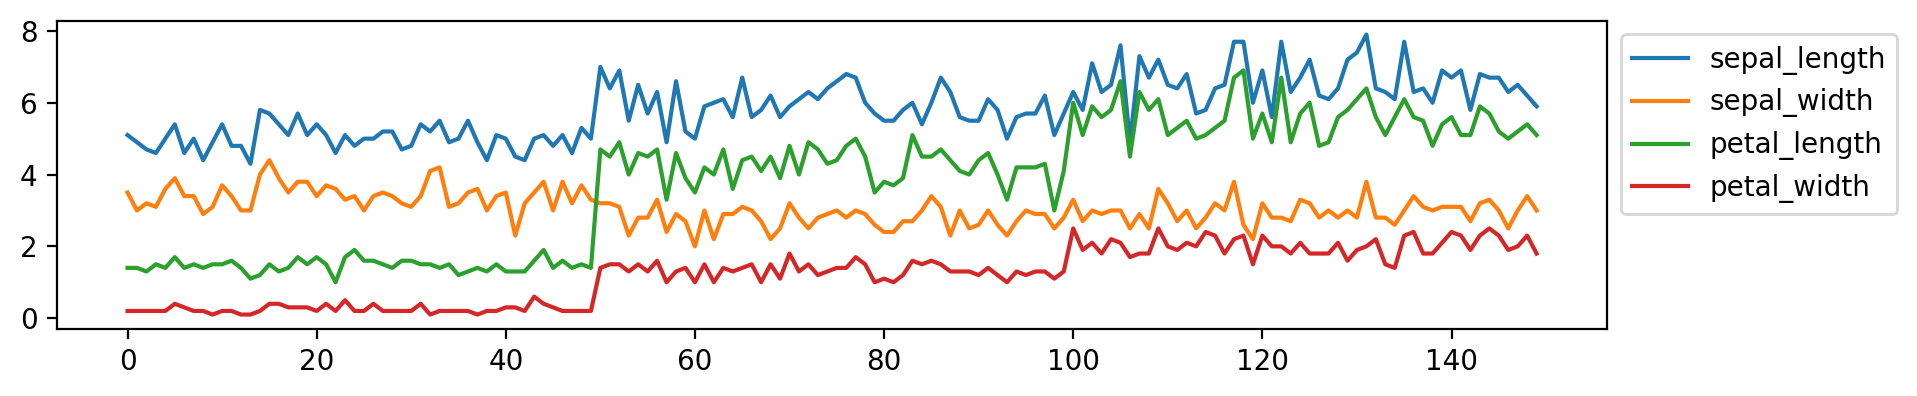

In [15]:
# plt.figure(figsize=(8, 2))
# plt.plot(iris.index, iris.iloc[:,:-1])
ax = iris.plot(kind='line', figsize=(10, 2))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [7]:
import seaborn as sns
iris = sns.load_dataset('iris')

- 교안(21page)=https
https://matplotlib.org/stable/tutorials/colors/colormaps.html

<Axes: title={'center': 'IRIS BoxPlot'}, ylabel='y-value'>

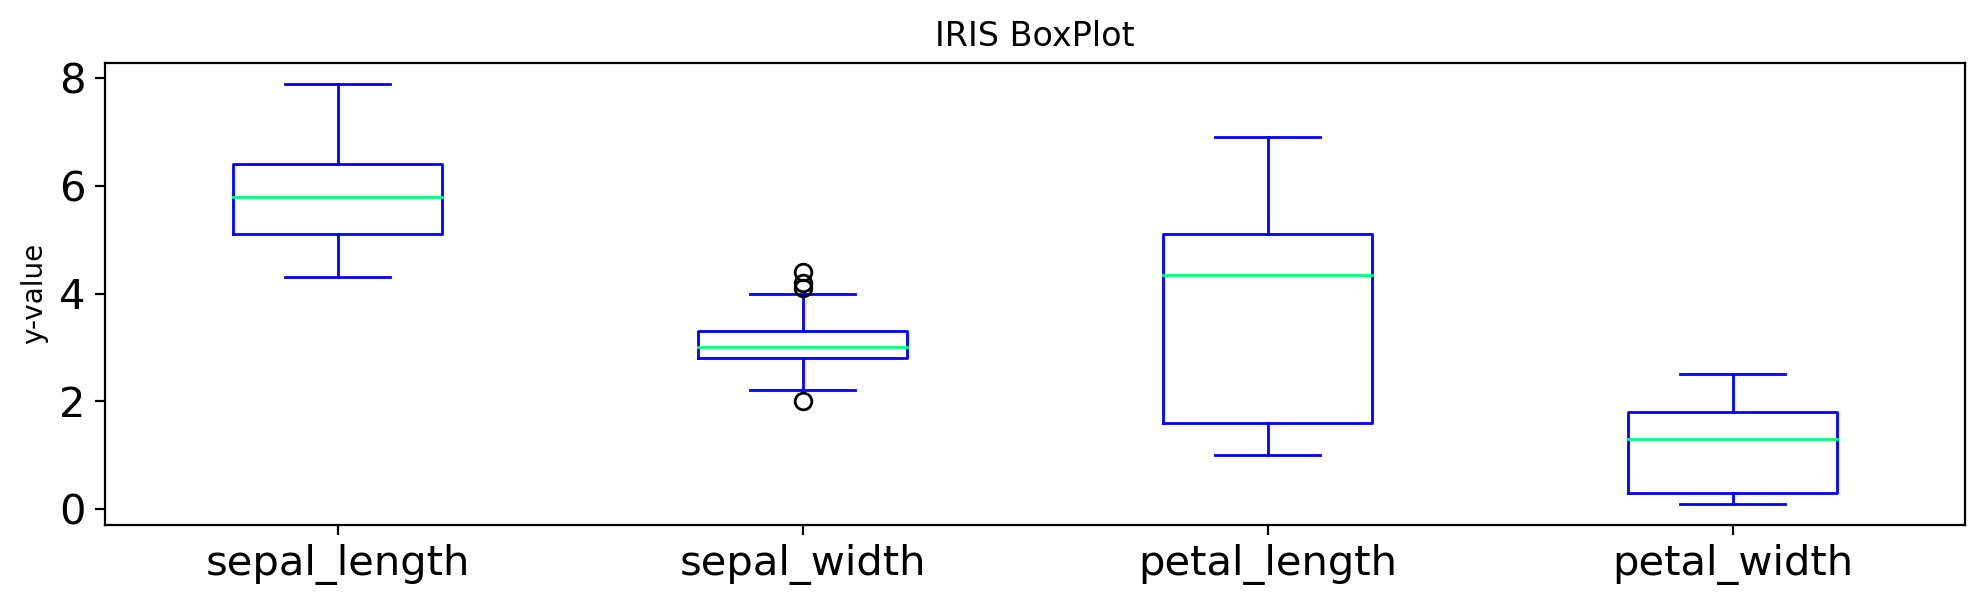

In [16]:
iris.plot(kind="box",figsize=(12,3),title='IRIS BoxPlot', ylabel='y-value', fontsize=15, colormap='winter')

sepal_length       Axes(0.125,0.11;0.168478x0.77)
sepal_width     Axes(0.327174,0.11;0.168478x0.77)
petal_length    Axes(0.529348,0.11;0.168478x0.77)
petal_width     Axes(0.731522,0.11;0.168478x0.77)
dtype: object

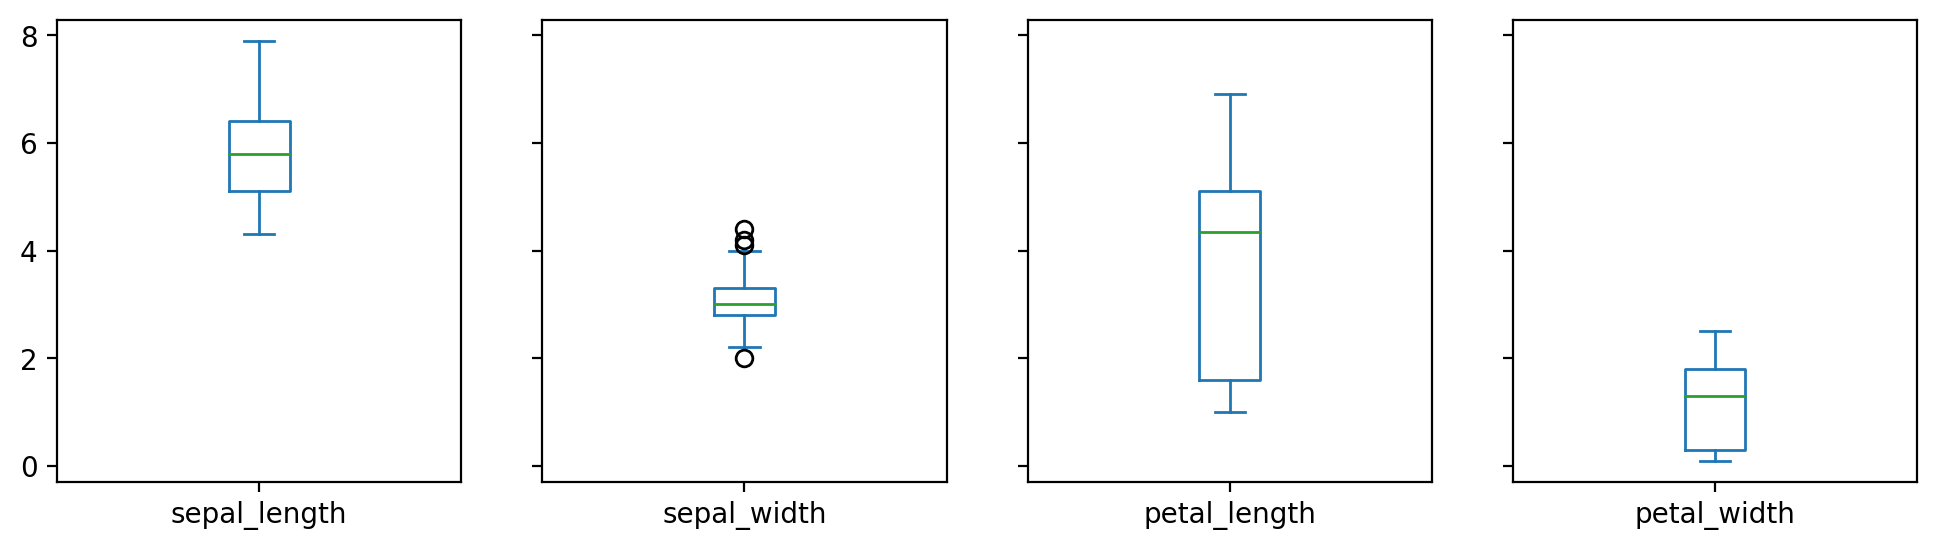

In [26]:
iris.plot(kind='box',figsize=(12,3), subplots=True, sharey=True)

<Axes: xlabel='petal_length', ylabel='petal_width'>

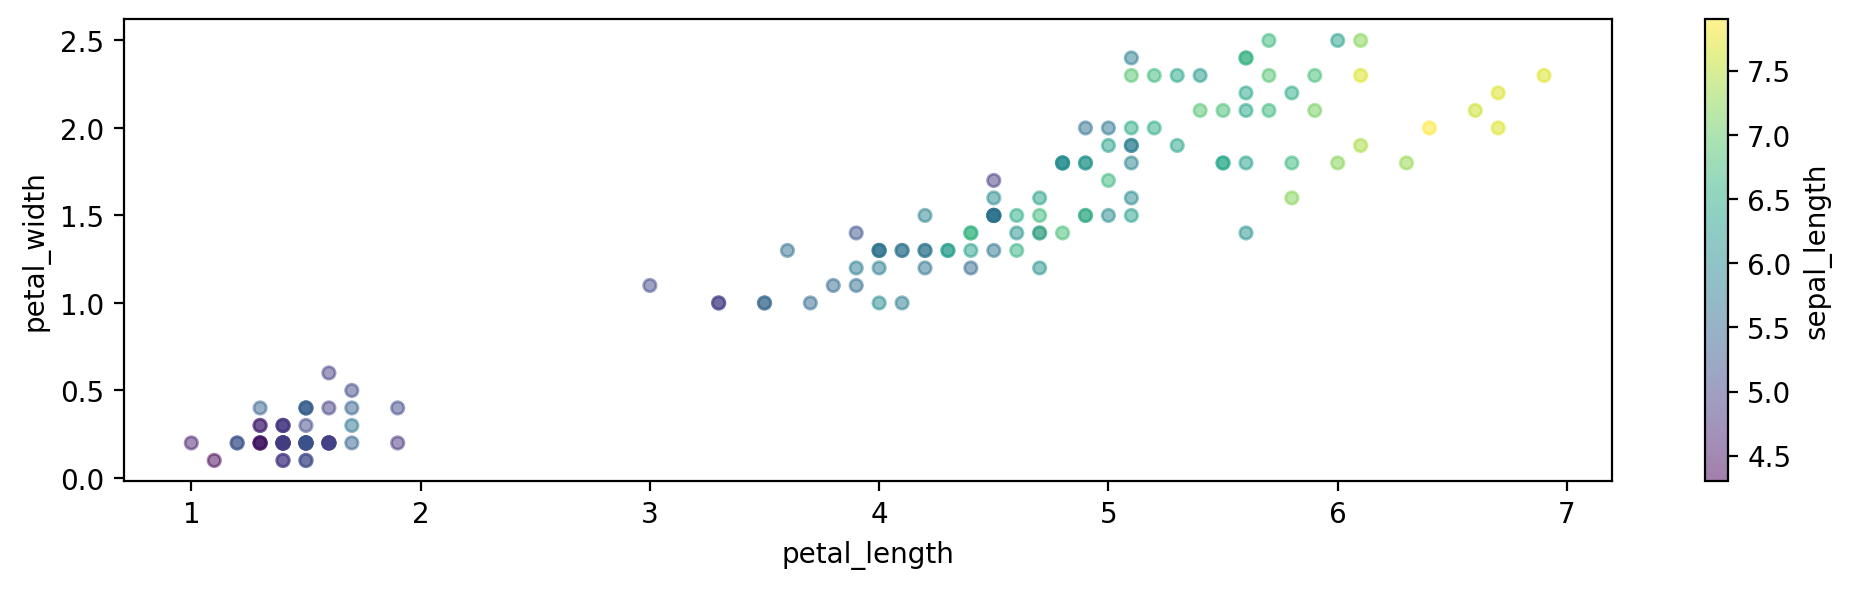

In [29]:
iris.plot(kind='scatter', x='petal_length',y='petal_width', figsize=(12,3), c='sepal_length', alpha=0.5)

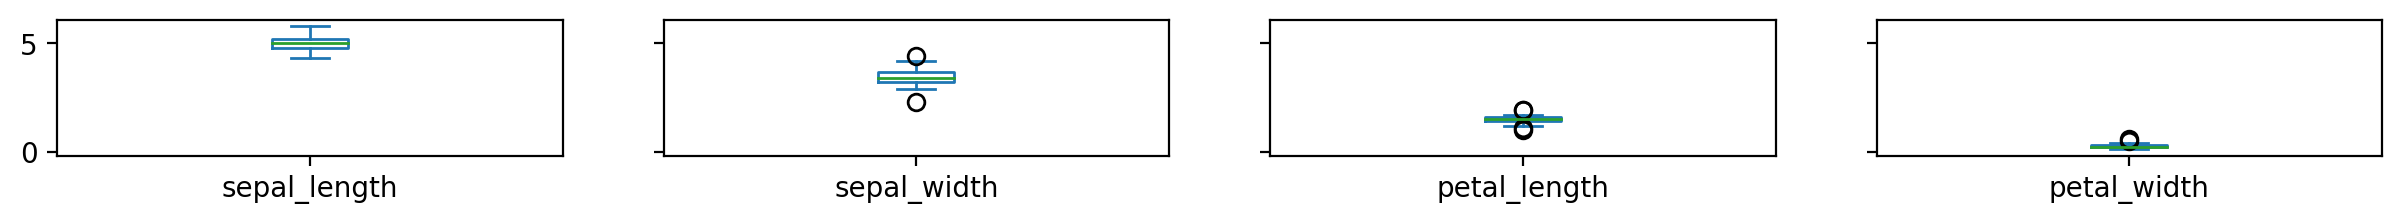

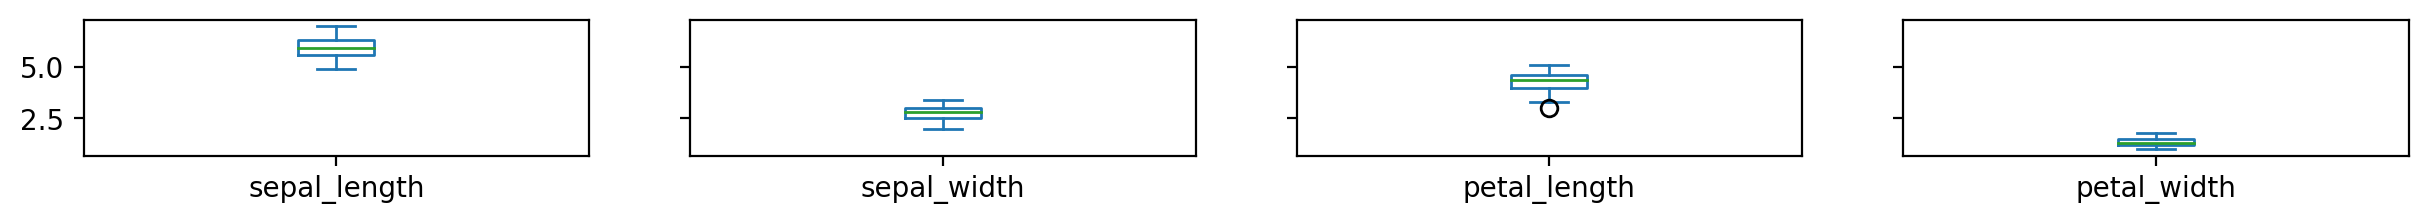

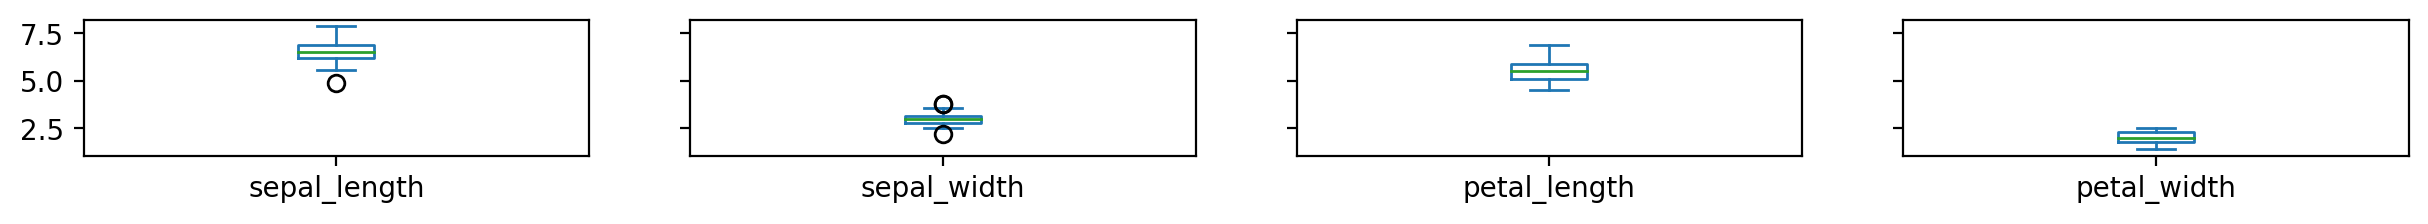

In [34]:
# 종별 boxplot
iris.groupby('species').plot(kind='box', figsize=(15,3), subplots=True, layout=(3,4), sharey=True)
plt.show()

### 4) plt.scatter(): 산점도

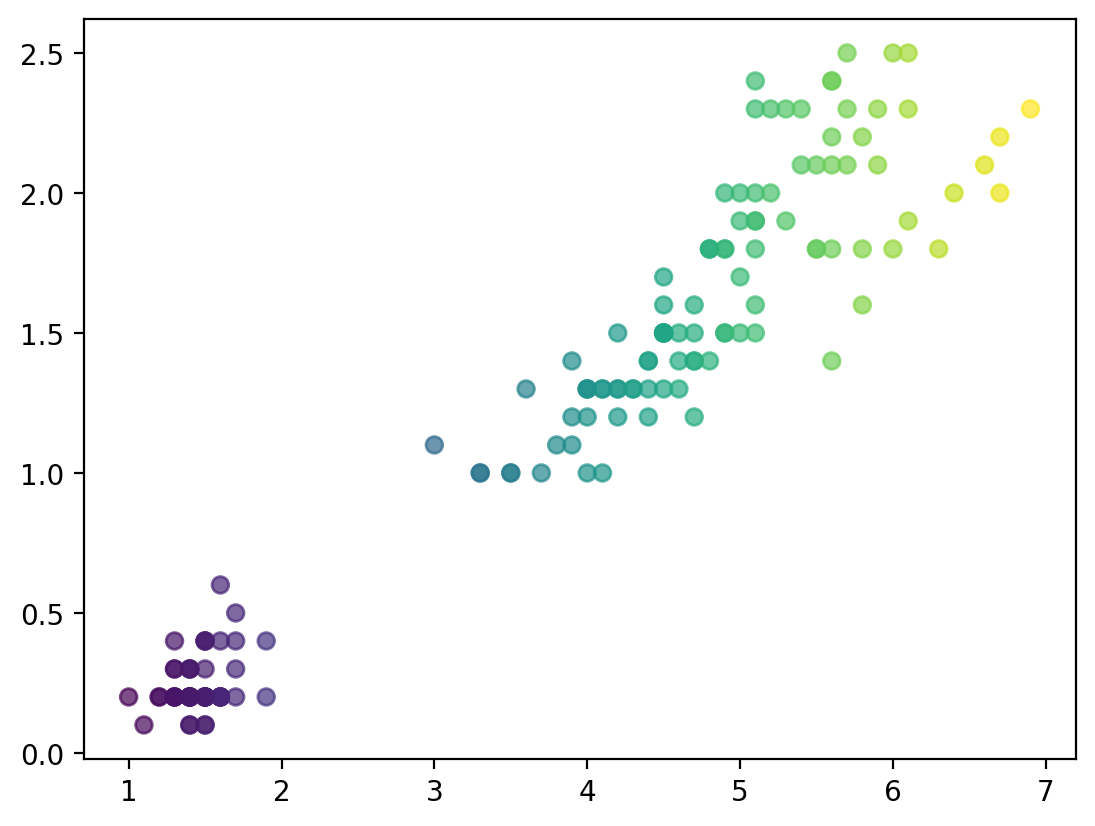

In [38]:
plt.scatter(iris.petal_length, iris.petal_width, c = iris.petal_length*20, alpha=0.7)

## 1.5 그 외 그래프 그리기
### 1) boxplot(분포를 모름), violinplt
- https://www.research.autodesk.com/publications/same-stats-different-graphs

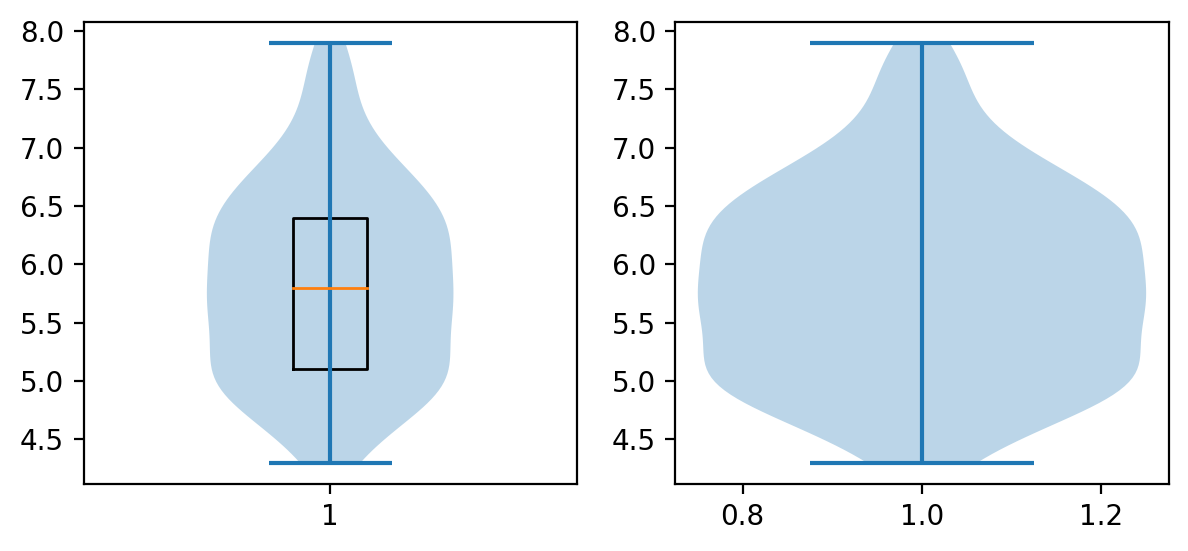

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

### 2) bar(), barh(), axvline(), axhline()

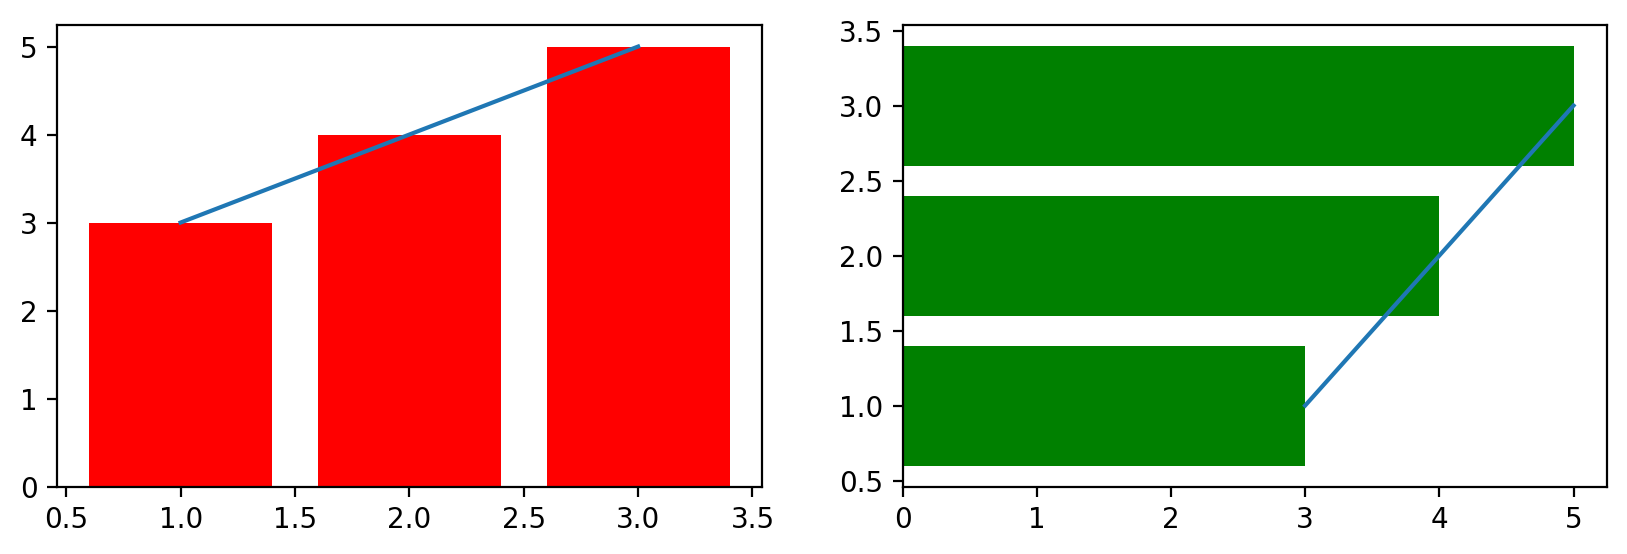

In [49]:
x = [1,2,3]
y= [3,4,5]
fig, axes = plt.subplots(ncols=2, figsize=(10,3))
axes[0].bar(x,y,color='r')
axes[0].plot(x, y)
axes[1].barh(x,y,color='g')
axes[1].plot(y,x)

### 3) hist(도수분포표, 히스토그램)

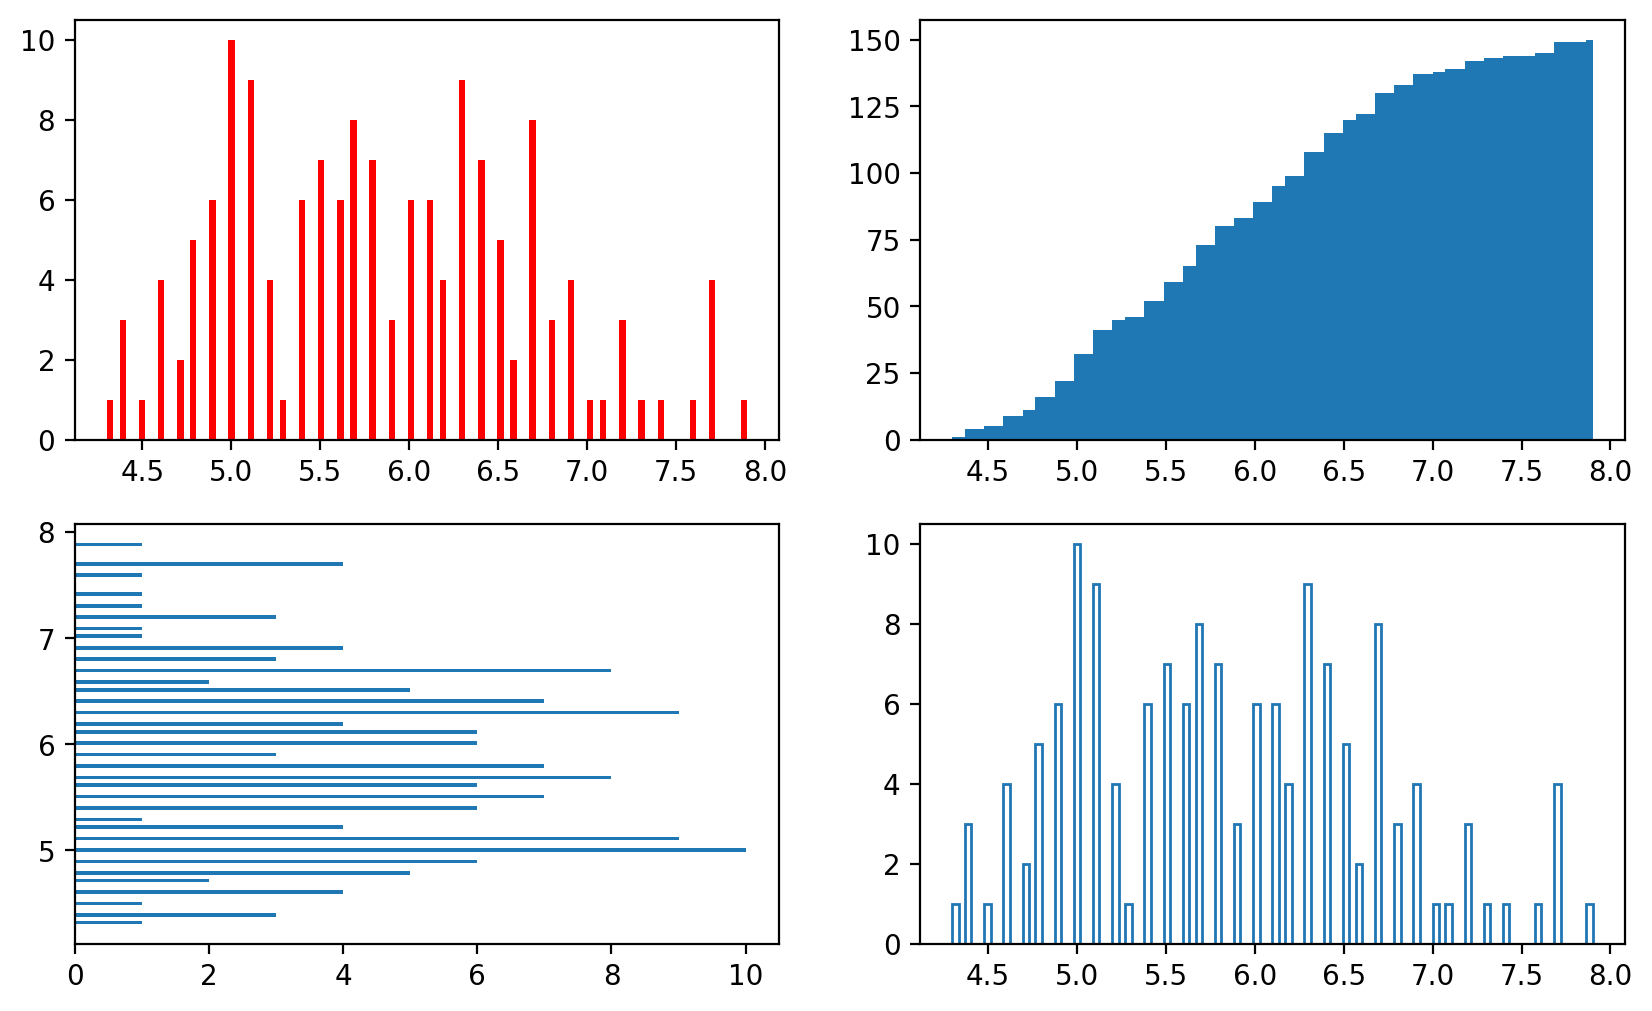

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=100, color='r') #히스토그램

axes[0,1].hist(iris.sepal_length, bins=100, cumulative=True) # 누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=100, orientation='horizontal')
axes[1,1].hist(iris.sepal_length, bins=100, histtype='step')

plt.show() 

### 4) axvline(), axhline(), fill(), fill_between()

In [63]:
import numpy as np

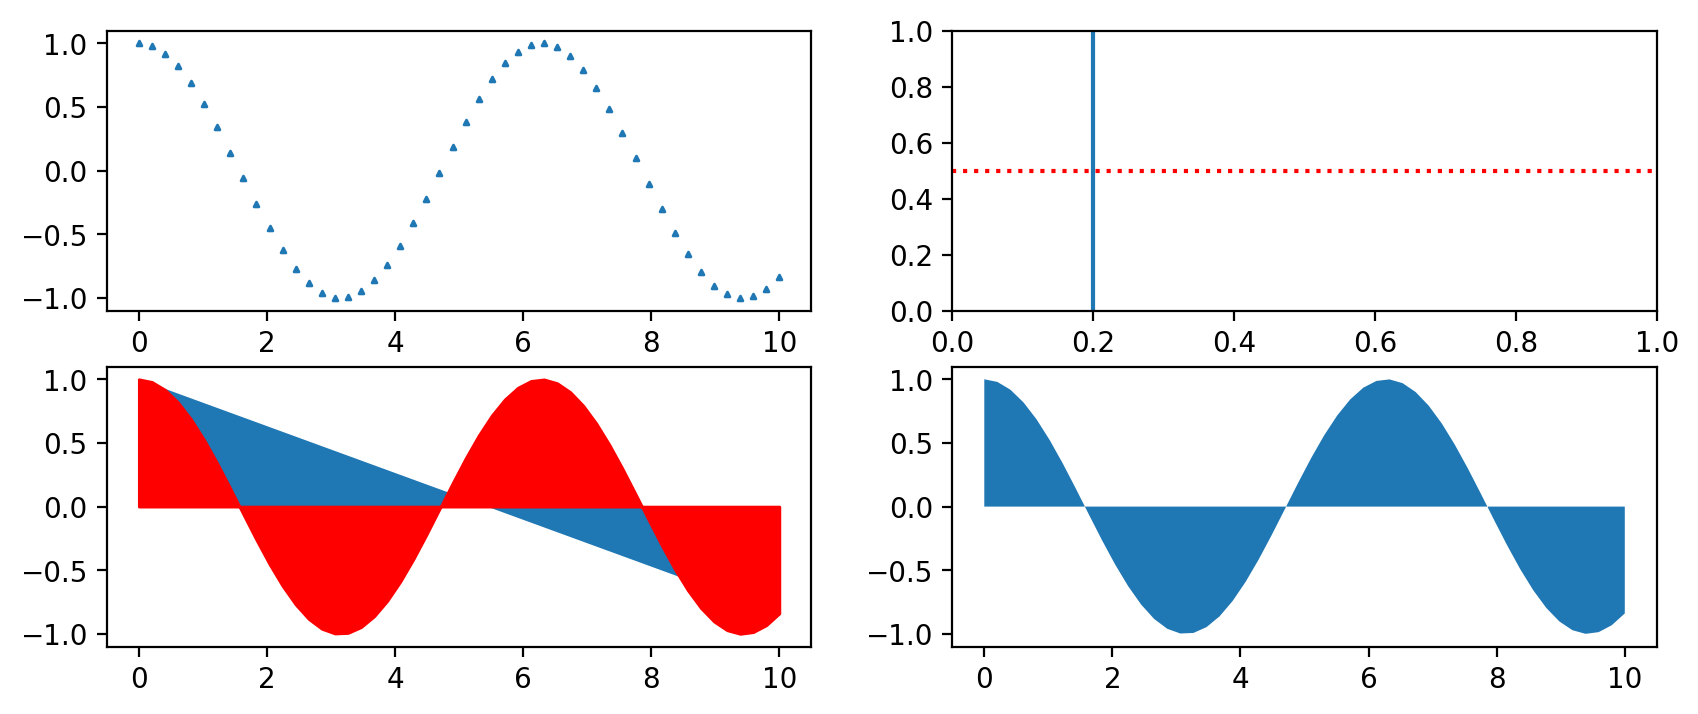

In [70]:
x= np.linspace(0,10) # 0부터 10까지 일정한 간격으로 50(기본값) 개 수 추출
y= np.cos(x)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
axes[0,0].scatter(x,y,s=3,marker='^')
axes[0,1].axvline(0.2)
axes[0,1].axhline(0.5, color='r',linestyle=':')
axes[1,0].fill(x,y)
axes[1,0].fill_between(x,y,color='r')
axes[1,1].fill_between(x,y)

plt.show()

### 5) pie
- 1차원

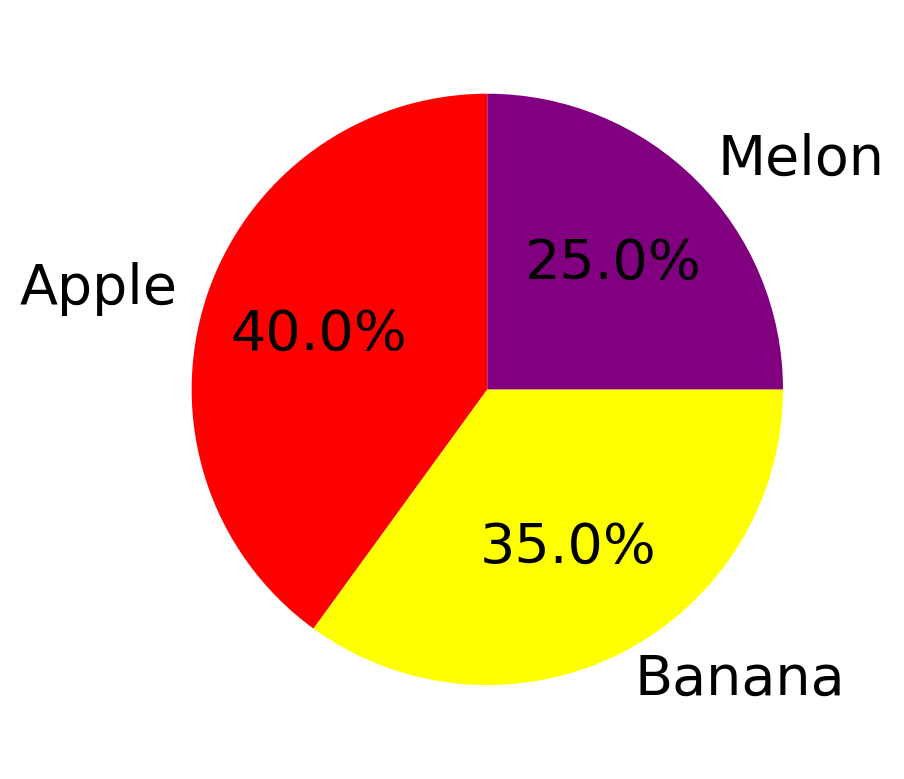

In [74]:
x= [40,35,25]
labels = ['Apple', 'Banana', 'Melon']
colors= ['red','yellow','purple']
plt.pie(x, labels=labels, autopct='%.1f%%', startangle=90, colors=colors, textprops={'fontsize':20})
plt.show()

## 1.6 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker
### 2) text(), annotate()
-https://matplotlib.org/stable/api/axes_api.html#text:

In [82]:
# 한글설정1
plt.rc('font', family='Malgun Gothic') # 윈도우OS
# plt.rc('font', family='Apple Gothic') # 맥OS
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지

In [87]:
# 한글특정 폰트 설정
from matplotlib.font_manager import FontProperties
font_file = 'C:\Windows\Fonts\HMFMPYUN.TTF' #네이버폰트, 구글폰트 다운
font_prop= FontProperties(fname=font_file, size=15)

Text(2, 0.75, 'Sine')

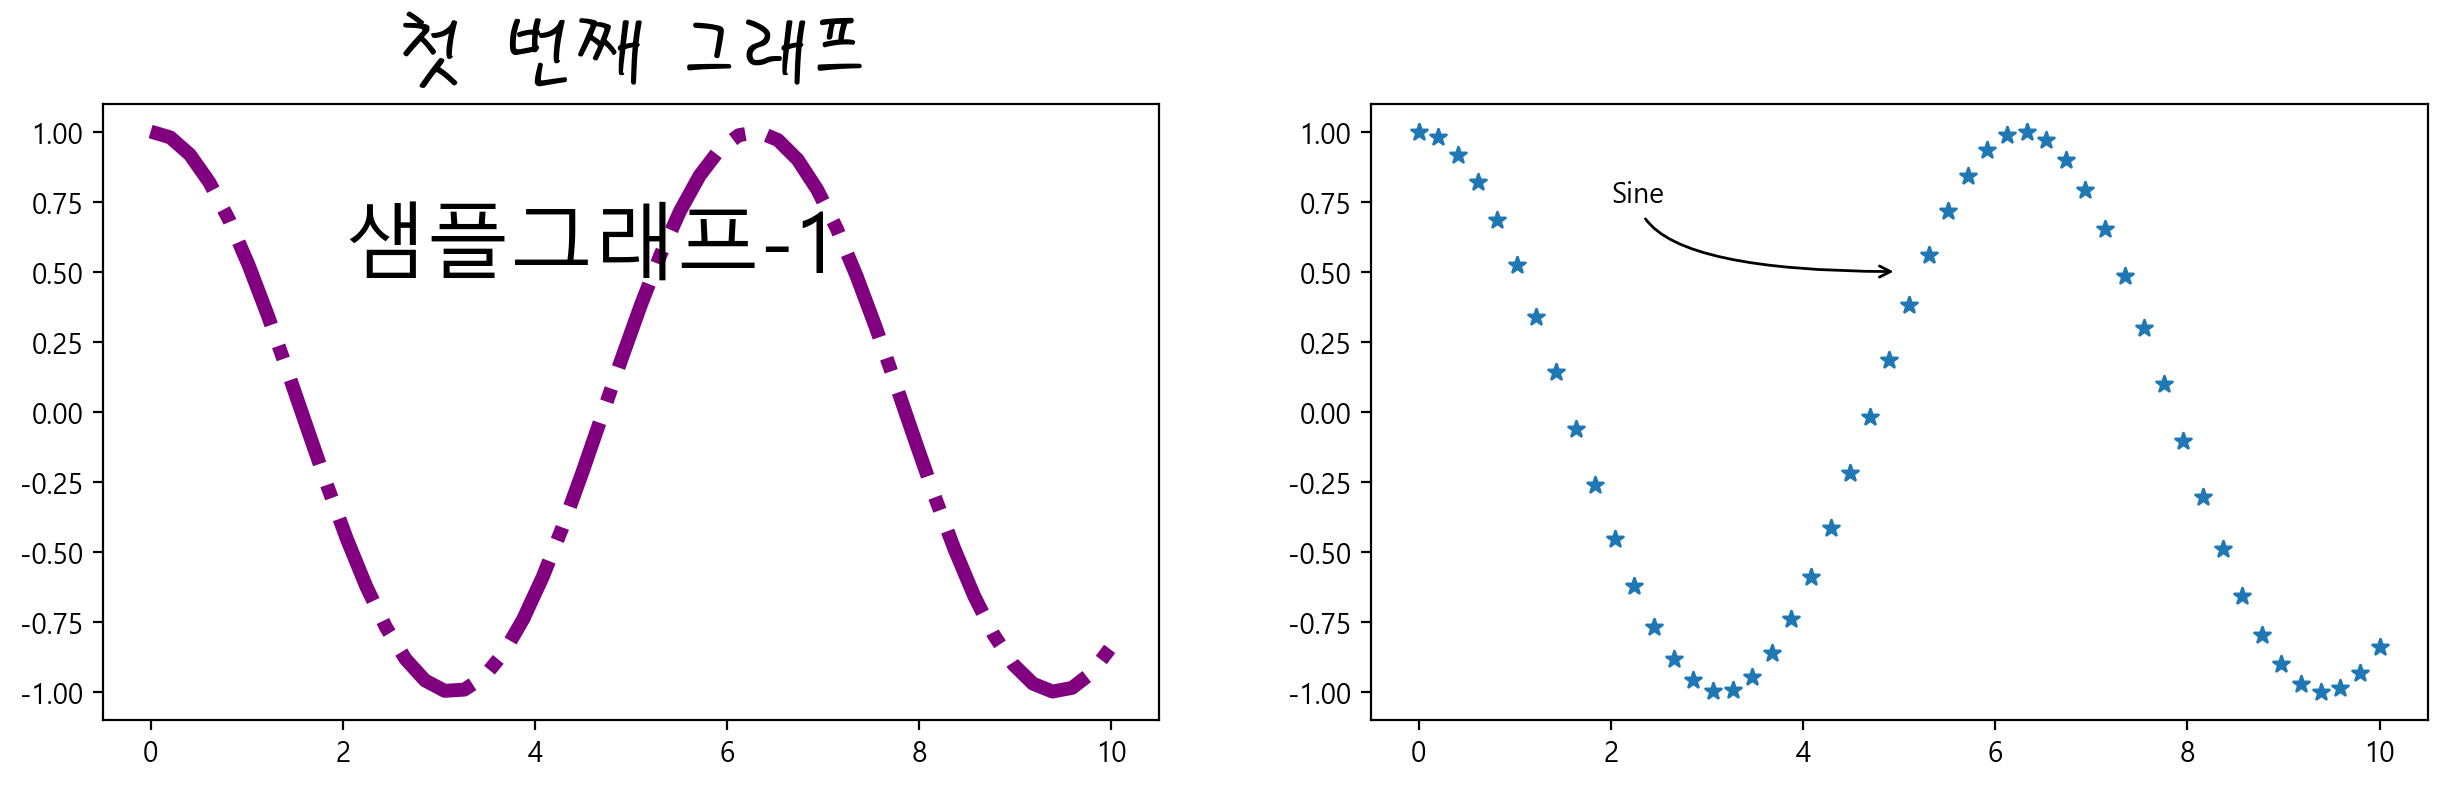

In [94]:

x= np.linspace(0,10) # num=50
y= np.cos(x)
# warnings.filterwarnings(action='default') # warning띄우기
fig, axes=plt.subplots(ncols=2, figsize=(15,4))
axes[0].plot(x,y, linewidth=5, linestyle='-.', color='purple')
axes[0].text(2, 0.5, '샘플그래프-1', fontsize= 30)
axes[0].set_title('첫 번째 그래프', fontproperties= font_prop, fontsize=30)

axes[1].scatter(x,y, marker='*')
axes[1].annotate('Sine', xytext=(2,0.75),# 글자와 글자가 있을 좌표
                 xy=(5,0.5), # 화살표가 가리킬 좌표
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='angle3'))
axes[1].set_title('두번째 그래프', fontproperties= font_prop)
plt.suptitle('메인 타이틀')
plt.tight_layout() #서브 플롯 레이아웃  조정
plt.show()

### 3) 수학기호
    * 교안(30page)

Text(0.5, 1.0, '$\\sqrt{x}$')

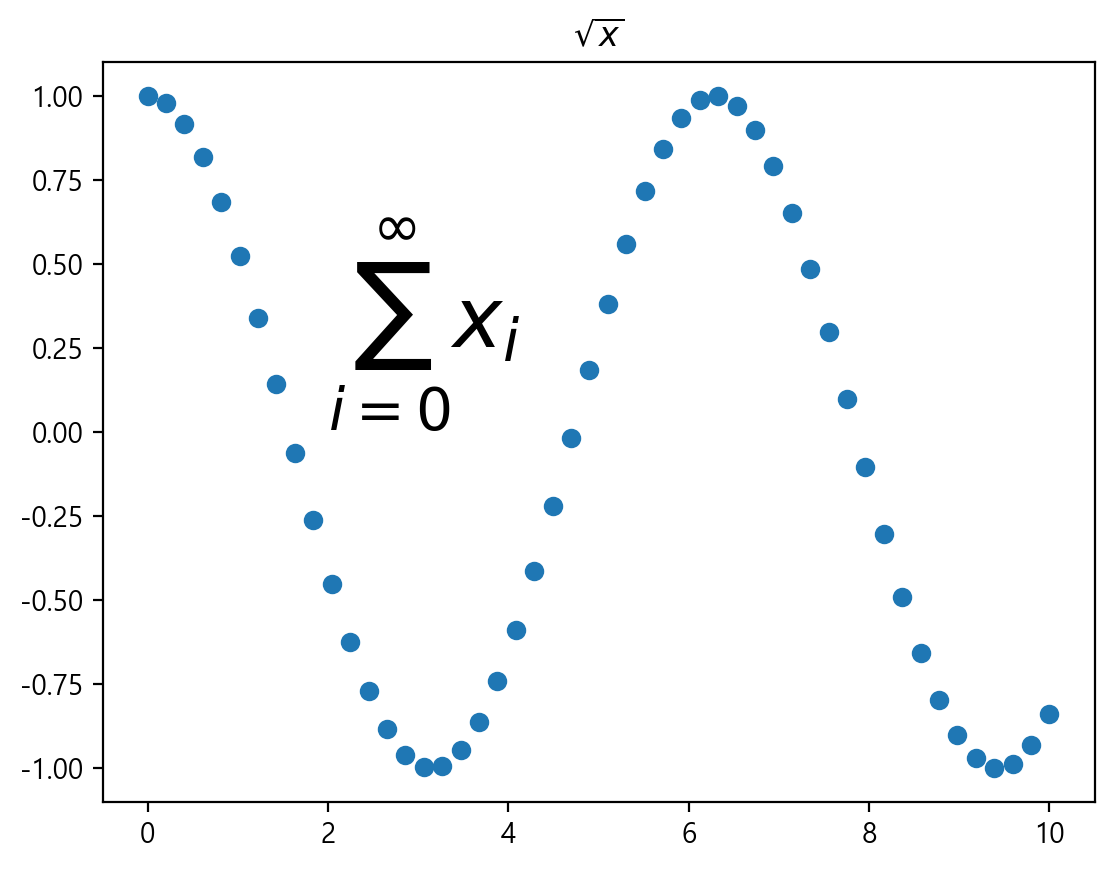

In [96]:
plt.scatter(x, y)
plt.text(2,0.25, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.title(r'$\sqrt{x}$')

### 4) 축과 눈금
- 교안 33page) https://matplotlib.org/3.1.0/api/axis_api.html

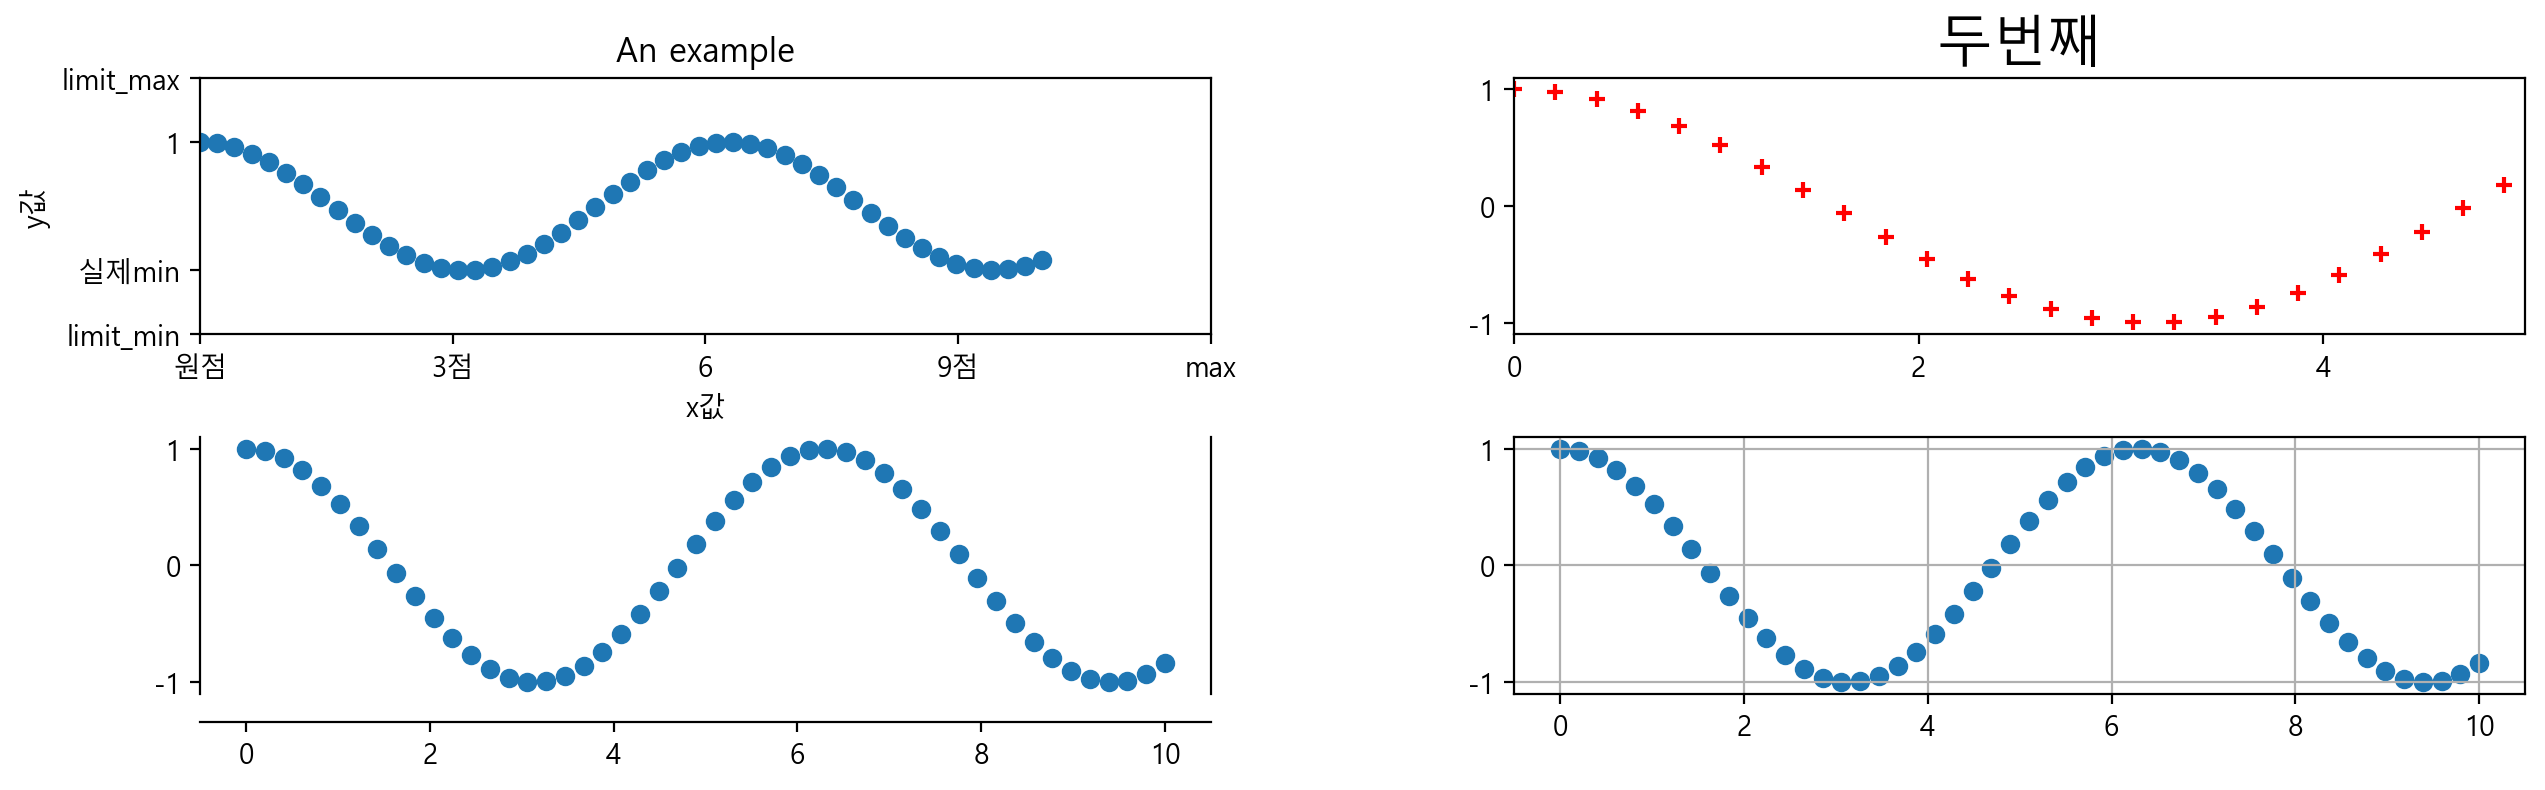

In [115]:
fig ,axes= plt.subplots(nrows=2, ncols=2, figsize=(15,4))
# 서브플롯끼리 여백 조정(title, x축 label)
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace(위아래 여백, 1은 서브플롯높이)
                                            # wspace(좌우 여백, 1은 서브플롯너비)
axes[0,0].scatter(x,y)
axes[0,0].set(title='An example',
             ylabel='y값',xlabel='x값',
             xlim = [0,12],# x축 눈금 범위
             xticks= [0,3,6,9,12], #x축 눈금
             xticklabels= ['원점','3점',6,'9점','max'], # x축 눈금 라벨
             ylim = [-2,2],# x축 눈금 범위
             yticks= [-2,-1,1,2], #x축 눈금
             yticklabels= ['limit_min','실제min',1,'limit_max'] # x축 눈금 라벨
             )
axes[0,1].scatter(x,y, color='r',marker='+')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim([0,5])
axes[0,1].set_xticks(range(0,6,2))
axes[1,0].scatter(x,y)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position(('outward',10)) #10pt만큼 바깥쪽으로 이동
axes[1,1].scatter(x,y)
axes[1,1].grid(True)
plt.show()


### 5) 축 공유 ★

In [116]:
x = np.arange(0,10)
y1= 0.5*x**2
y2 = -y1

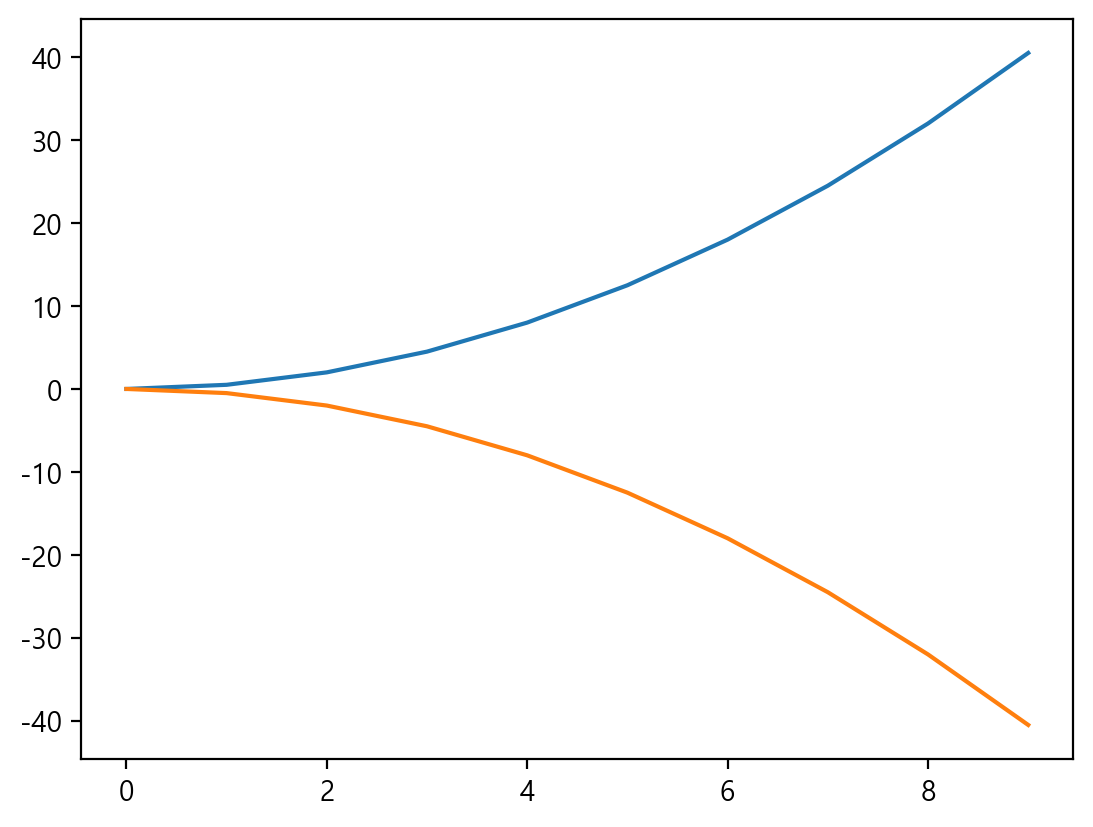

In [117]:
plt.plot(x,y1)
plt.plot(x,y2)

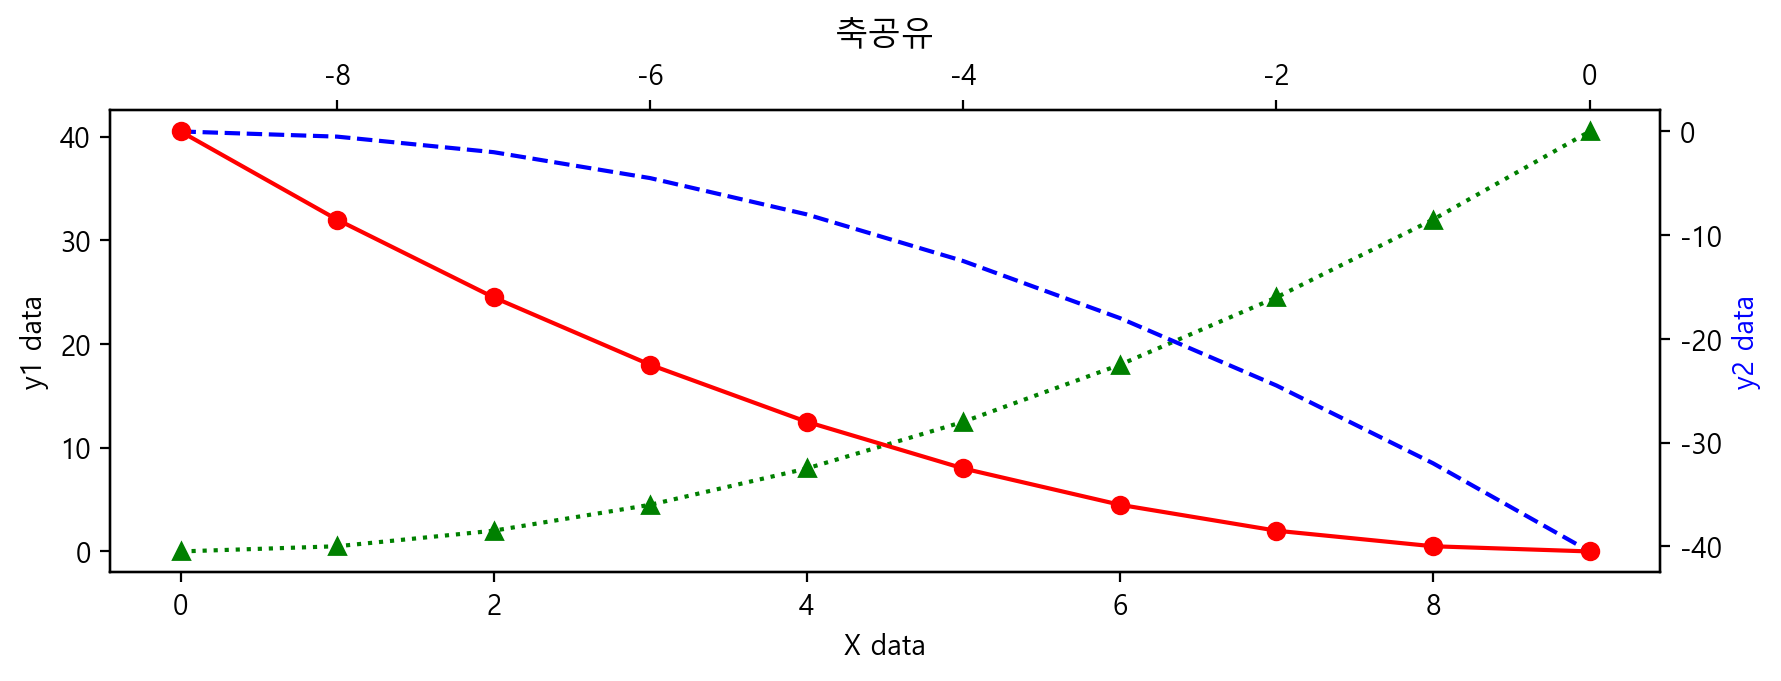

In [124]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x,y1,'g^:')
ax1.set(title='축공유', xlabel='X data', ylabel= 'y1 data')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3= ax1.twiny() #ax1과 y축을 공유하는 ax3
ax3.plot(-x,y1,'ro-', label= '-x와 y1')

### 6) 범례표시
### 7) 플롯스타일 지정

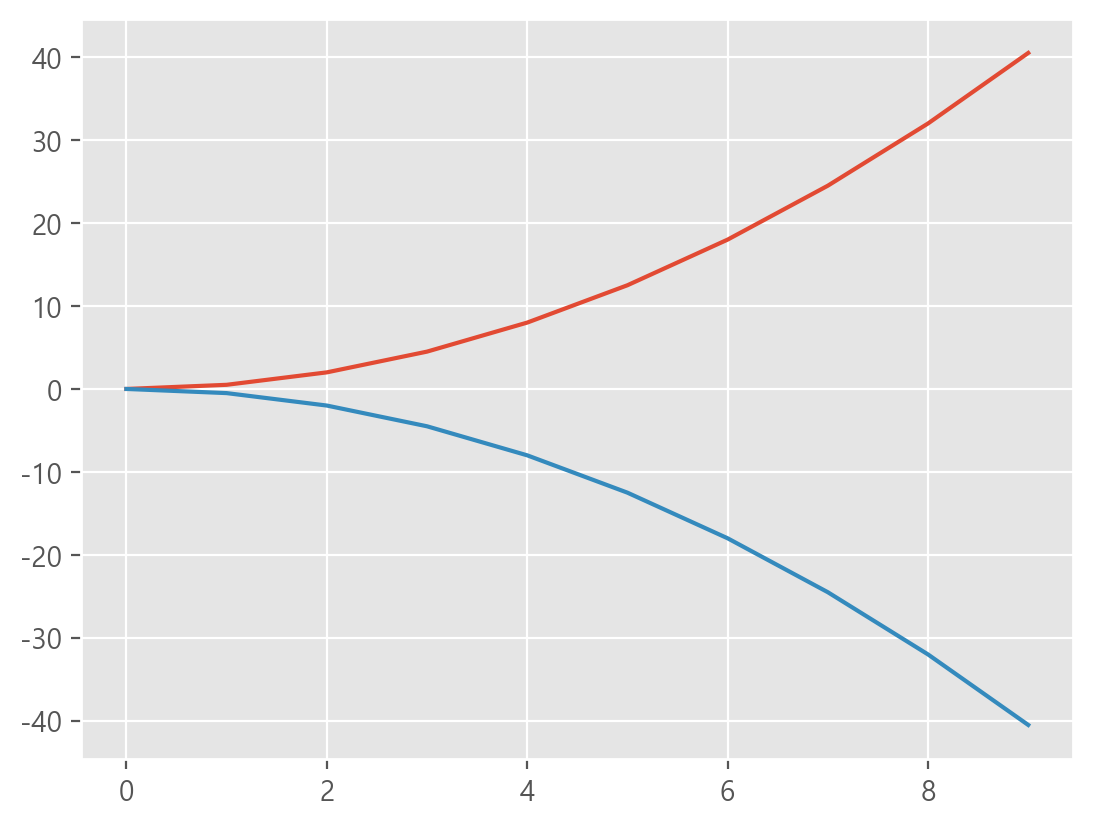

In [126]:
plt.style.use('ggplot') # default, ggplot, classic, ....
plt.plot(x, y1, label='x&y1')
plt.plot(x,y2, label='x&y2')
plt.legend(loc='center right')
plt.show()